<a href="https://colab.research.google.com/github/malekkhaled/Machine_Learning/blob/main/Titanic_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Titanic - Machine Learning from Disaster</b>



The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

I will be building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#reading train and test data from csv files to dataframes.
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Dropping the Name column as it most propably doesn't affect the chances of surviving


In [ ]:
df_train.drop(columns='Name',axis=1,inplace=True)
df_test.drop(columns='Name',axis=1,inplace=True)

Dropping the Name column as it most propably doesn't affect the chances of surviving


In [ ]:
df_train.drop(columns=['Ticket'], inplace=True)
df_test.drop(columns=['Ticket'], inplace=True)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Filling NaN values of Cabin with nc: no cabin

In [ ]:
df_train['Cabin'].fillna('nc', inplace=True)
df_test['Cabin'].fillna('nc', inplace=True)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,nc,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,nc,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,nc,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,nc,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,nc,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
df_train['Cabin'].unique()

array(['nc', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

Storing the first letter of cabin in the cabin column.

In [ ]:
for i in range(len(df_train['Cabin'])):
  df_train['Cabin'][i] = df_train['Cabin'][i][0]
  
for i in range(len(df_test['Cabin'])):
  df_test['Cabin'][i] = df_test['Cabin'][i][0]

df_train['Cabin'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
for i in range(len(df_test['Cabin'])):
  df_test['Cabin'][i] = df_test['Cabin'][i][0]
  
for i in range(len(df_test['Cabin'])):
  df_test['Cabin'][i] = df_test['Cabin'][i][0]

df_test['Cabin'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array(['n', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,n,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,n,S
3,4,1,1,female,35.0,1,0,53.1000,C,S
4,5,0,3,male,35.0,0,0,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,n,S
887,888,1,1,female,19.0,0,0,30.0000,B,S
888,889,0,3,female,NaN,1,2,23.4500,n,S
889,890,1,1,male,26.0,0,0,30.0000,C,C


In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [ ]:
df_train.groupby(by='Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
for i in range(len(df_test['Pclass'])):
  if (df_train['Pclass'][i] == 1 & pd.isna(df_train['Age'][i])):
    df_train['Age'][i] = 38
  if (df_train['Pclass'][i] == 2 & pd.isna(df_train['Age'][i])):
    df_train['Age'][i] = 30
  if (df_train['Pclass'][i] == 1 & pd.isna(df_train['Age'][i])):
    df_train['Age'][i] = 25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            162
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [ ]:
df_test.groupby(by='Pclass',).mean()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1098.224299,40.918367,0.476636,0.383178,94.280297
2,1117.935484,28.777500,0.376344,0.344086,22.202104
3,1094.178899,24.027945,0.463303,0.417431,12.459678


In [ ]:
for i in range(len(df_test['Pclass'])):
  if (df_test['Pclass'][i] == 1 & pd.isna(df_test['Age'][i])):
    df_test['Age'][i] = 40
  if (df_test['Pclass'][i] == 2 & pd.isna(df_test['Age'][i])):
    df_test['Age'][i] = 28
  if (df_test['Pclass'][i] == 1 & pd.isna(df_test['Age'][i])):
    df_test['Age'][i] = 24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            77
SibSp           0
Parch           0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [ ]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            162
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [ ]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,n,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,n,S
3,4,1,1,female,35.0,1,0,53.1000,C,S
4,5,0,3,male,35.0,0,0,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,n,S
887,888,1,1,female,19.0,0,0,30.0000,B,S
888,889,0,3,female,NaN,1,2,23.4500,n,S
889,890,1,1,male,26.0,0,0,30.0000,C,C


In [ ]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.026592,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.073088,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.376943,0.083081,0.018443,-0.549500
Age,0.026592,-0.073088,-0.376943,1.000000,-0.310197,-0.192966,0.100481
SibSp,-0.057527,-0.035322,0.083081,-0.310197,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.192966,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.100481,0.159651,0.216225,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_train['Age'] = MinMaxScaler().fit_transform(np.array(df_train['Age']).reshape(-1,1))
df_train['Fare'] = MinMaxScaler().fit_transform(np.array(df_train['Fare']).reshape(-1,1))
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,0.271174,1,0,0.014151,n,S
1,2,1,1,female,0.472229,1,0,0.139136,C,C
2,3,1,3,female,0.321438,0,0,0.015469,n,S
3,4,1,1,female,0.434531,1,0,0.103644,C,S
4,5,0,3,male,0.434531,0,0,0.015713,n,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0.334004,0,0,0.025374,n,S
887,888,1,1,female,0.233476,0,0,0.058556,B,S
888,889,0,3,female,NaN,1,2,0.045771,n,S
889,890,1,1,male,0.321438,0,0,0.058556,C,C


In [ ]:
df_test['Age'] = MinMaxScaler().fit_transform(np.array(df_test['Age']).reshape(-1,1))
df_test['Fare'] = MinMaxScaler().fit_transform(np.array(df_test['Fare']).reshape(-1,1))

In [ ]:
df_train['Sex'] = df_train['Sex'].map({'male': 0,'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0,'female': 1})

In [ ]:
df_train = pd.get_dummies(df_train)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,0.271174,1,0,0.014151,0,0,0,0,0,0,0,0,1,0,0,1
1,2,1,1,1,0.472229,1,0,0.139136,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,3,1,0.321438,0,0,0.015469,0,0,0,0,0,0,0,0,1,0,0,1
3,4,1,1,1,0.434531,1,0,0.103644,0,0,1,0,0,0,0,0,0,0,0,1
4,5,0,3,0,0.434531,0,0,0.015713,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0.334004,0,0,0.025374,0,0,0,0,0,0,0,0,1,0,0,1
887,888,1,1,1,0.233476,0,0,0.058556,0,1,0,0,0,0,0,0,0,0,0,1
888,889,0,3,1,NaN,1,2,0.045771,0,0,0,0,0,0,0,0,1,0,0,1
889,890,1,1,0,0.321438,0,0,0.058556,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_train = df_train.drop(columns='Cabin_T')

In [ ]:
df_test = pd.get_dummies(df_test)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
X = df_train.iloc[:,2:]
y = df_train.iloc[:,1]

In [ ]:
model.fit(X,y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(df_test.drop(columns=['PassengerId']))

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_subm = pd.DataFrame(columns = ['PassengerID', 'Survived'])
df_subm['Survived'] = y_pred

In [ ]:
df_subm['PassengerID'] = df_test['PassengerId']

In [ ]:
df_subm

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_subm.to_csv('Submission.csv', index = False)

Kaggle Score: 0.77990

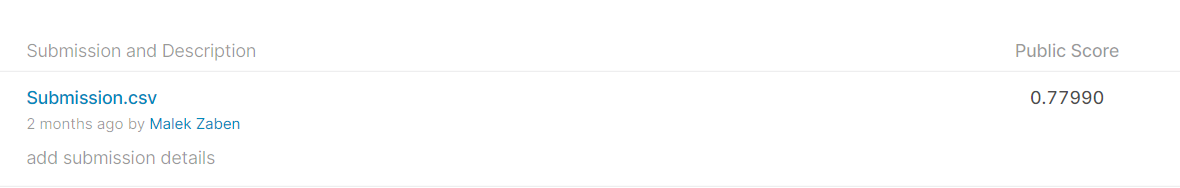